<a href="https://colab.research.google.com/github/i-r-a/toxic/blob/master/toxNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import os
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
from keras import Sequential
from keras import layers
from nltk.corpus import stopwords
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [94]:
train = pd.read_csv('drive/My Drive/clean_data.csv')

In [95]:
train.drop([53787,64904,76037,106891,141293,163251,
168946,
178686,
193979,
200638,
202961,
204721,
210601,
213685,
217810],inplace=True)

In [96]:
y = train['toxic']
x = train['comment_text']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

In [97]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [98]:
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [99]:
input_dim = X_train.shape[1]

In [100]:
model = Sequential()
model.add(layers.Dense(10,input_dim = input_dim, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [101]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                2851280   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 2,851,291
Trainable params: 2,851,291
Non-trainable params: 0
_________________________________________________________________


##Toxic vs Non-toxic

In [ ]:
history = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)

In [ ]:
print(accuracy)

0.9717883467674255


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from plotnine import *

In [ ]:
predictions = model.predict(X_train)

In [ ]:
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))

In [ ]:
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    161660
           1       0.94      0.76      0.84     17167

    accuracy                           0.97    178827
   macro avg       0.96      0.88      0.91    178827
weighted avg       0.97      0.97      0.97    178827



In [ ]:
print(confusion_matrix(y_train,pred))

[[160784    876]
 [  4169  12998]]


In [ ]:
fpr,tpr,thresh = roc_curve(y_train,pred)

In [ ]:
roc_auc = auc(fpr,tpr)
print(fpr)
print(tpr)
print(len(pred))

[0.         0.00541878 1.        ]
[0.         0.75715035 1.        ]
178827


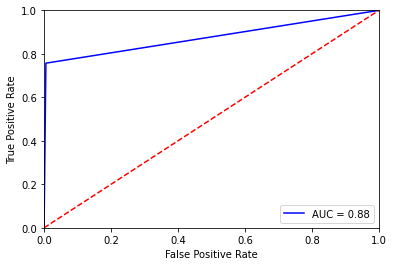

In [ ]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

In [ ]:
print(accuracy)

0.9502539038658142


In [ ]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     40490
           1       0.82      0.60      0.69      4217

    accuracy                           0.95     44707
   macro avg       0.89      0.79      0.83     44707
weighted avg       0.95      0.95      0.95     44707

[[39944   546]
 [ 1705  2512]]


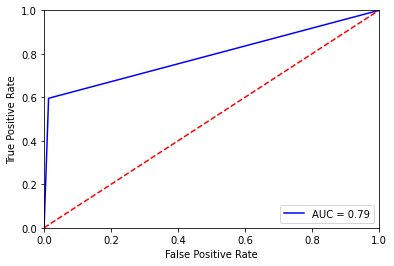

In [ ]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


##Severe Toxic

In [ ]:
y = train['severe_toxic']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [ ]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [ ]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    177295
           1       0.78      0.30      0.43      1532

    accuracy                           0.99    178827
   macro avg       0.89      0.65      0.71    178827
weighted avg       0.99      0.99      0.99    178827

[[177166    129]
 [  1074    458]]


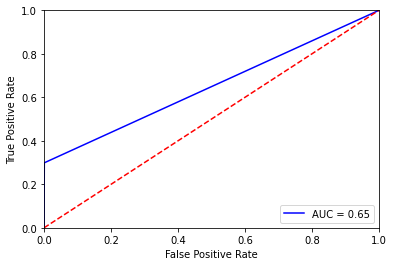

In [ ]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     44277
           1       0.53      0.17      0.26       430

    accuracy                           0.99     44707
   macro avg       0.76      0.58      0.63     44707
weighted avg       0.99      0.99      0.99     44707

[[44211    66]
 [  357    73]]


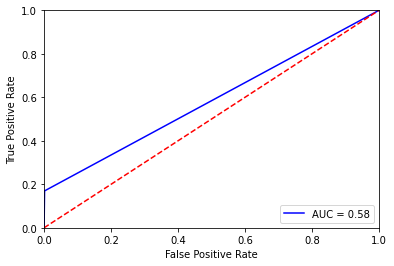

In [ ]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.9940836429595947
Test accuracy:
0.9904713034629822


##Obscene

In [73]:
y = train['obscene']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [74]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [75]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    169058
           1       0.93      0.81      0.87      9769

    accuracy                           0.99    178827
   macro avg       0.96      0.90      0.93    178827
weighted avg       0.99      0.99      0.99    178827

[[168455    603]
 [  1839   7930]]


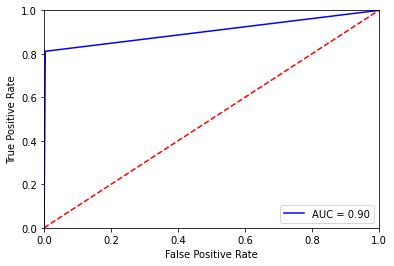

In [77]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [79]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     42336
           1       0.82      0.64      0.72      2371

    accuracy                           0.97     44707
   macro avg       0.90      0.82      0.85     44707
weighted avg       0.97      0.97      0.97     44707

[[42011   325]
 [  854  1517]]


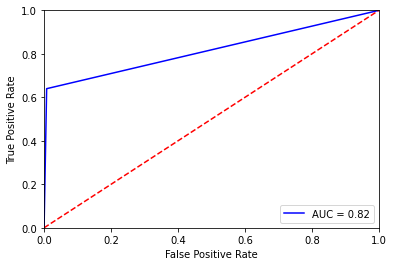

In [80]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [76]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.9863443374633789
Test accuracy:
0.9736282825469971


##Threat

In [83]:
y = train['threat']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [84]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [85]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    178278
           1       0.96      0.32      0.48       549

    accuracy                           1.00    178827
   macro avg       0.98      0.66      0.74    178827
weighted avg       1.00      1.00      1.00    178827

[[178271      7]
 [   373    176]]


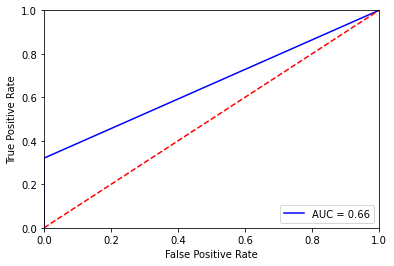

In [86]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [87]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44567
           1       0.41      0.06      0.11       140

    accuracy                           1.00     44707
   macro avg       0.70      0.53      0.55     44707
weighted avg       1.00      1.00      1.00     44707

[[44554    13]
 [  131     9]]


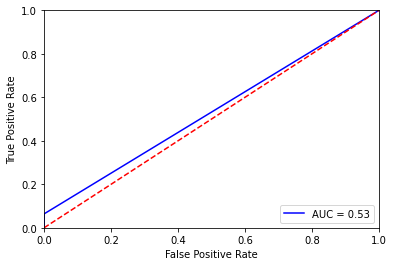

In [88]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.9969803094863892
Test accuracy:
0.996823787689209


##Insult

In [102]:
y = train['insult']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [103]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [104]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    169746
           1       0.89      0.78      0.83      9081

    accuracy                           0.98    178827
   macro avg       0.94      0.89      0.91    178827
weighted avg       0.98      0.98      0.98    178827

[[168876    870]
 [  1985   7096]]


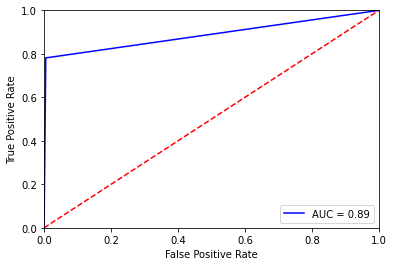

In [105]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [106]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     42484
           1       0.76      0.57      0.65      2223

    accuracy                           0.97     44707
   macro avg       0.87      0.78      0.82     44707
weighted avg       0.97      0.97      0.97     44707

[[42081   403]
 [  950  1273]]


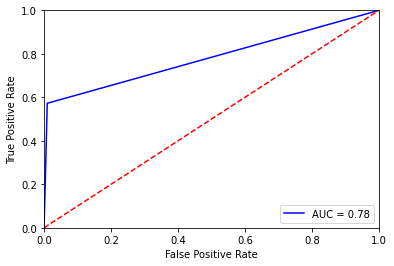

In [107]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.9848792552947998
Test accuracy:
0.9695349931716919


##Identity Hate

In [108]:
y = train['identity_hate']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [109]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [110]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177115
           1       0.94      0.58      0.72      1712

    accuracy                           1.00    178827
   macro avg       0.97      0.79      0.86    178827
weighted avg       1.00      1.00      1.00    178827

[[177054     61]
 [   713    999]]


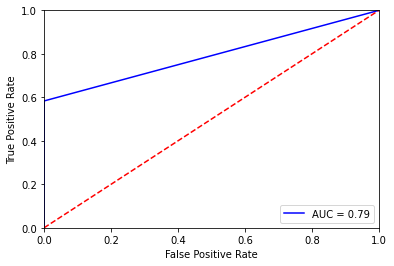

In [111]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [112]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     44302
           1       0.58      0.21      0.31       405

    accuracy                           0.99     44707
   macro avg       0.78      0.61      0.65     44707
weighted avg       0.99      0.99      0.99     44707

[[44238    64]
 [  318    87]]


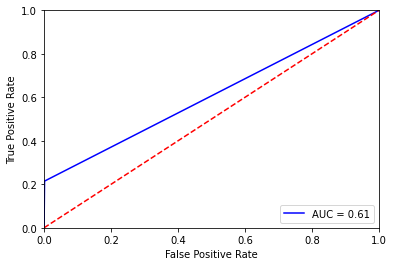

In [113]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.9952523708343506
Test accuracy:
0.9915896654129028
